## Essential functionality
- Reindexing
- reindex
- reindex function arguments
- Dropping entries from an axis
- Indexing, selection, and filtering
- Arithmetic and data alignment
- Arithmetic methods with fill values
- Operations between DataFrame and Series
- Function application and mapping
- Axis indexes with duplicate values

In [3]:
# from images import bigpycraft_bda as bpc
#from IPython.display import Image 

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

# 2. Essential functionality

# Reindexing

In [4]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [5]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2 # 이렇게 하면 굳이 위처럼 다시 처음부터 재설정을 안 해줘도 인덱스만 변경 가능

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [6]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0) # NaN 값은 0으로 바꿔줌

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

# reindex 메소드(보간) 옵션
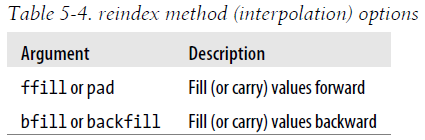

In [8]:
# ffill 메소드 : 앞의 값으로 누락된 값을 채워 넣기
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill') # 값이 비어 있으면 해당 값 전의 것으로 값을 넣어줌

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [9]:
# ffill 메소드 : 앞의 값으로 누락된 값을 채워 넣기
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill') # 전과 반대로 뒤의 값을 앞에다 넣어줌

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [10]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [8]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2 # reindex를 했을 때 NaN값이 있으면 int에서 float로 바뀌게 됨(주의)

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [11]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states) # column의 index를 바꿀 때는 coulmn이라고 명시

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [17]:
frame.reindex(index=['a', 'b', 'c', 'd'])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [21]:
frame.reindex(index=['a', 'b', 'c', 'd'], columns=states)

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


In [14]:
 frame.loc[['a', 'c', 'b', 'd'], states] # 이런 식으로 순서 바꾸기도 가능

C:\Python\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Texas,Utah,California
a,1.0,NaN,2.0
c,4.0,NaN,5.0
b,NaN,NaN,NaN
d,7.0,NaN,8.0


# 재색인 함수 인자
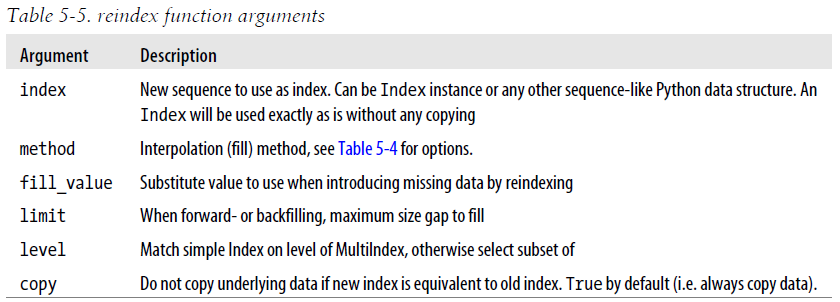

# Dropping entries from an axis

In [15]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [17]:
# 이래도 본체는 삭제가 안 돼서 주소값을 원래 주소값으로 하거나 del을 사용해야 함, drop과 del의 차이
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [18]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [19]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [20]:
data.drop(['Colorado', 'Ohio']) # 이래도 원본값은 사라지지 않아

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop('two', axis=1) # 컬럼을 지워주고 싶다면 drop의 default axis = 0이라 axis =1로 명시

# Indexing, selection, and filtering

In [22]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [23]:
obj['b'] # == obj[1]

1.0

In [26]:
obj[['b', 'a', 'd']]# != obj['b', 'a', 'd'] 이거는 실행 자체가 안 됨 팬시인덱싱이라고 생각하면 됨

b    1.0
a    0.0
d    3.0
dtype: float64

In [28]:
obj[2:4] # 이렇게 실행시키면 2,3 가져오지만

c    2.0
d    3.0
dtype: float64

In [30]:
obj['b':'d'] # 이러면 3개 가져옴. 문자열은 -1 이런 개념이 없음.

b    1.0
c    2.0
d    3.0
dtype: float64

In [32]:
data < 5 # 이런 식의 연산도 가능

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [33]:
data[data < 5] = 0; data # 값들이 false인 것들만 출력

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [34]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [37]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]] # 인덱스값이 숫자일 수 있으므로 이런 방법은 지향하자

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [38]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [39]:
data.ix[data.three > 5, :3] # ix는 곧 없어질 거임.

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


# DataFrame의 값 선택하기
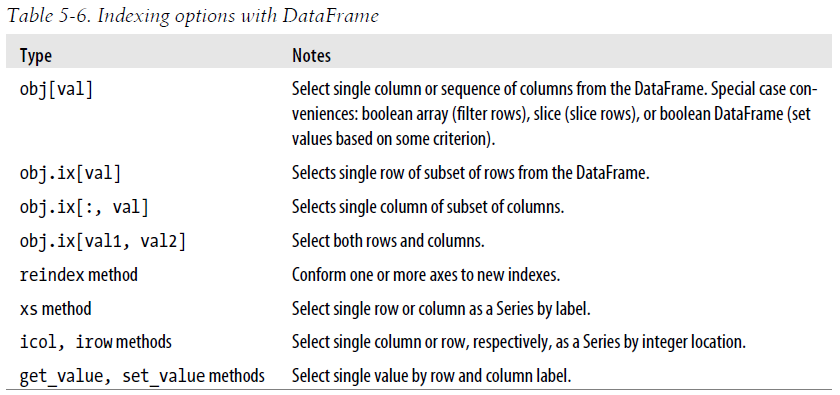

# Arithmetic and data alignment

In [40]:
s1 = Series([ 7.3, -2.5, 3.4, 1.5],    index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [41]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [42]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [44]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [45]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [47]:
df1 + df2 # 이런 식으로 NaN값이 됨

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


# Arithmetic methods with fill values

In [52]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [53]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [54]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [55]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [57]:
df1.add(df2, fill_value=0) # df1의 e 값을 만들면 값들이 다 NaN인데 거기에 0을 넣고 연산을 하게 헤줌

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [58]:
df1.reindex(columns=df2.columns, fill_value=0) # df1에 e 컬럼을 새로 만들고 0을 넣음

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


# 산술연산 메소드
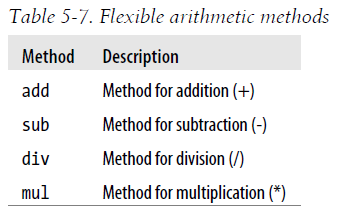

# Operations between DataFrame and Series

In [59]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [60]:
arr - arr[0] # 이러면 arr axis 0마다 다 연산을 해줌

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [61]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [62]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [63]:
frame - series # 결과는 아까 위에서 했던 것처럼 각 로우마다 뺴줌

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [64]:
series2 = Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [65]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [66]:
frame + series2 # NaN 발생

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [67]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [68]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [69]:
frame.sub(series3, axis=0) # 빼주는 거임

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


# Function application and mapping

In [22]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [118]:
frame

,b,d,e
Utah,-0.152441,-1.631567,1.218619
Ohio,-0.761150,0.870861,2.062551
Texas,-0.224980,-1.151564,1.460872
Oregon,-0.545276,-1.082933,-0.392810


In [72]:
np.abs(frame) # 절대값으로 변경

,b,d,e
Utah,0.881863,0.732807,0.605344
Ohio,2.643923,1.190996,0.769566
Texas,1.173963,0.869805,0.139447
Oregon,1.001776,1.587671,2.682448


In [73]:
f = lambda x: x.max() - x.min() 

In [76]:
frame.apply(f, axis = 0) # 기본값이 axis = 0 인듯, apply(적용할 식, 적용할 axis)

b    3.817885
d    2.320478
e    3.452014
dtype: float64

In [119]:
frame

,b,d,e
Utah,-0.152441,-1.631567,1.218619
Ohio,-0.761150,0.870861,2.062551
Texas,-0.224980,-1.151564,1.460872
Oregon,-0.545276,-1.082933,-0.392810


In [121]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f) # default = 0

,b,d,e
min,-0.761150,-1.631567,-0.392810
max,-0.152441,0.870861,2.062551


In [24]:
# 실수값을 문자열 포맷으로 변환
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.60,0.56,1.52
Ohio,1.19,2.31,0.15
Texas,-2.17,-0.11,-0.68
Oregon,1.00,0.64,0.47


# Sorting and ranking

In [80]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index() # 인덱스 정렬

a    1
b    2
c    3
d    0
dtype: int64

In [81]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame.sort_index() # index 기준 정렬

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [82]:
frame.sort_index(axis=1) # 컬럼 기준 정렬

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [83]:
frame.sort_index(axis=1, ascending=False) # 컬럼 기준 내림차순 정렬

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [84]:
obj = Series([4, 7, -3, 2])
# obj.order()
obj.sort_values() # 값 기준 정렬

2   -3
3    2
0    4
1    7
dtype: int64

In [86]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values() # 정렬하면 NaN이 가장 뒤로 감

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [87]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [92]:
# frame.sort_index(by='b')
frame.sort_values(by='b') # 값을 정렬할 때 b 컬럼을 우선순위에 두고 정렬함

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [93]:
frame.sort_values(by=['a', 'b']) # a 다음 b를 기준으로 정렬, 'a'만 적어주는 거랑은 다름

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [94]:
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [95]:
obj.rank() #순위를 줌(값이 낮을수록 순위가 높음)

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [102]:
obj.rank(method='first') #  0.5등 이런 거 없이 먼저 온 순위대로 랭킹 매김

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [105]:
obj.rank(method='max') # max 하면 아무것도 안 적어준 값에서 0.5씩 올라감,

0    7.0
1    1.0
2    7.0
3    5.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [106]:
obj.rank(method='min') # min 하면 아무것도 안 적어준 값에서 0.5씩 내려감

0    6.0
1    1.0
2    6.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

In [114]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 
                   'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [115]:
frame.rank(axis=1) # 컬럼 기준 정렬해서 값을 df으로 적어줌

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


# 순위의 동률을 처리하는 메소드
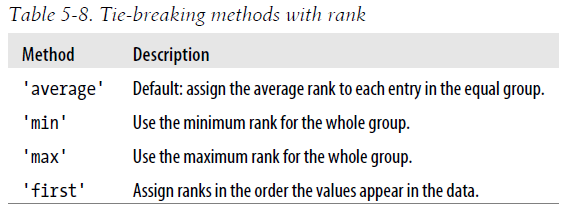

# Axis indexes with duplicate values

In [107]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [108]:
obj.index.is_unique # 각 값들이 다 유니크한가?

False

In [109]:
obj['a']

a    0
a    1
dtype: int64

In [110]:
obj['c']

4

In [111]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.323762,0.951397,0.102495
a,-0.126773,-1.090528,-0.088213
b,-1.203912,-0.072756,-0.547629
b,-0.162306,0.235601,-0.838568


In [112]:
df.loc['b']

,0,1,2
b,-1.203912,-0.072756,-0.547629
b,-0.162306,0.235601,-0.838568
